In [ ]:
!pip install xgboost scikit-learn

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

df = pd.read_csv("nba_salaries_2.csv")

# X and y
X = df[["Linear_PER"]]
y = df["Salary"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = XGBRegressor()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 8362663.63


In [36]:
print(pd.unique(df["Position"]))

['PG' 'PF' 'SG' 'SF' 'PG-SG' 'C' 'SF-SG' 'SG-PG' 'SF-PF']


In [62]:
# Select features
# features = ["Linear_PER", "MP", "GP", "PTS", "TRB", "AST", "STL", "Age", "3P%", "eFG%"]
features = [
    "Age",
    "GP",
    "GS",
    "MP",
    "FG",
    "FGA",
    "FG%",
    "3P",
    "3PA",
    "3P%",
    "2P",
    "2PA",
    "2P%",
    "eFG%",
    "FT",
    "FTA",
    "FT%",
    "ORB",
    "DRB",
    "TRB",
    "AST",
    "STL",
    "BLK",
    "TOV",
    "PF",
    "PTS",
    "Linear_PER",
]
X = df[features]
y = df["Salary"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = XGBRegressor()
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


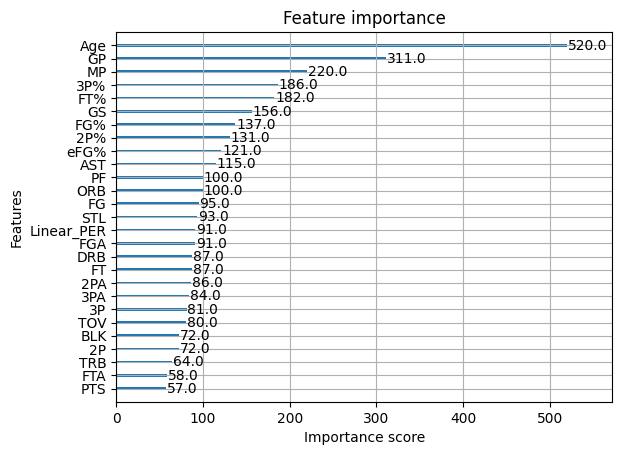

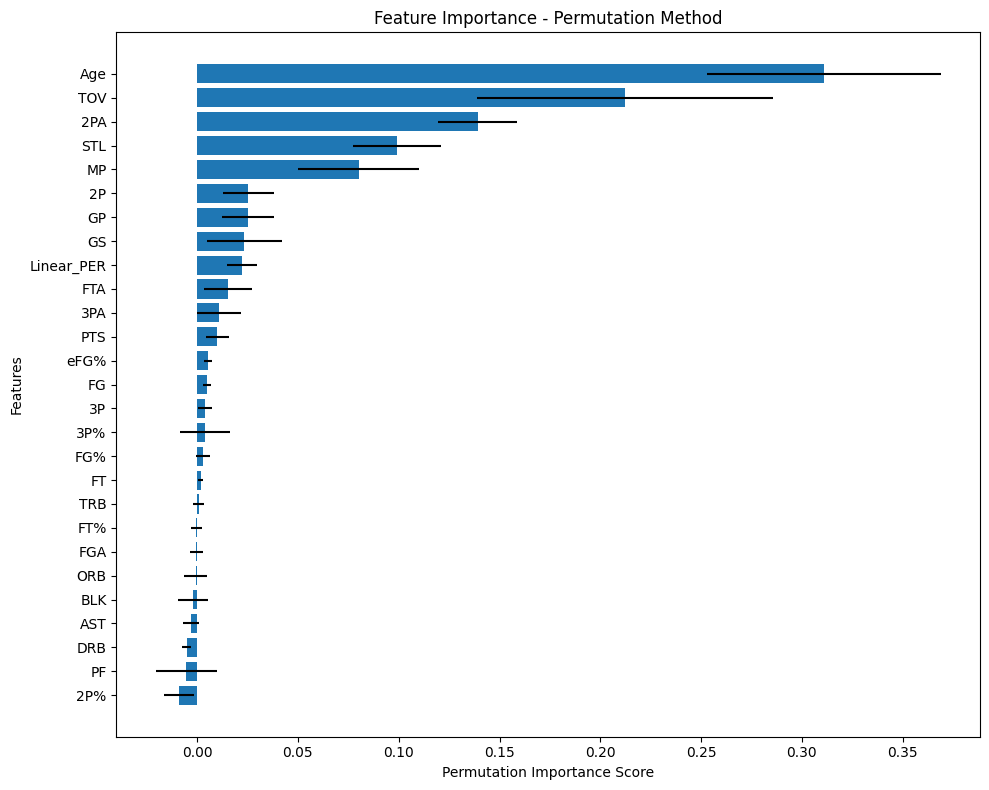

In [59]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.inspection import permutation_importance

# feature importance
plot_importance(model)

perm_importance = permutation_importance(model, X_test, y_test)
plt.show()
feature_names = X_test.columns
perm_scores = perm_importance.importances_mean
perm_std = perm_importance.importances_std

# Sort features by importance score
sorted_idx = perm_scores.argsort()
sorted_features = feature_names[sorted_idx]
sorted_scores = perm_scores[sorted_idx]
sorted_std = perm_std[sorted_idx]

# Create horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_scores, xerr=sorted_std)
plt.xlabel("Permutation Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Permutation Method")
plt.tight_layout()
plt.show()

In [63]:
# Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 6359615.79


In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

features = list(X.columns)
rmse_history = []

for i in range(len(features) - 5):  # Leave at least 5 features
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X[features], y, test_size=0.2, random_state=42
    )

    # Train model
    model = XGBRegressor()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_history.append((list(features), rmse))

    # Get feature importances
    importances = model.feature_importances_
    least_important_idx = np.argmin(importances)
    least_important_feature = features[least_important_idx]

    print(f"Step {i+1}: Removed '{least_important_feature}' - RMSE: {rmse:.2f}")

    # Remove least important feature
    features.pop(least_important_idx)

Step 1: Removed 'TRB' - RMSE: 6359615.79
Step 2: Removed 'FG%' - RMSE: 6346993.54
Step 3: Removed 'FT%' - RMSE: 6224341.36
Step 4: Removed '2P%' - RMSE: 6085312.11
Step 5: Removed 'ORB' - RMSE: 6141264.63
Step 6: Removed 'PF' - RMSE: 6111913.83
Step 7: Removed 'AST' - RMSE: 5885784.72
Step 8: Removed '3P' - RMSE: 5895391.67
Step 9: Removed 'FG' - RMSE: 5878133.91
Step 10: Removed '2P' - RMSE: 5765983.88
Step 11: Removed 'GP' - RMSE: 5390095.75
Step 12: Removed 'FT' - RMSE: 5658242.44
Step 13: Removed 'eFG%' - RMSE: 6029711.64
Step 14: Removed 'DRB' - RMSE: 5728549.06
Step 15: Removed 'BLK' - RMSE: 5728087.77
Step 16: Removed '3P%' - RMSE: 5759558.98
Step 17: Removed 'Linear_PER' - RMSE: 5717171.83
Step 18: Removed 'FGA' - RMSE: 5125432.31
Step 19: Removed '3PA' - RMSE: 5320358.12
Step 20: Removed 'FTA' - RMSE: 5842117.35
Step 21: Removed 'GS' - RMSE: 5760009.92
Step 22: Removed 'STL' - RMSE: 5818707.70


In [50]:
import random
from itertools import combinations
import numpy as np

features = list(X.columns)
results = []

for _ in range(2000):  # Try 2000 random combinations
    k = random.randint(2, min(10, len(features)))
    combo = random.sample(features, k)

    X_train, X_test, y_train, y_test = train_test_split(
        X[combo], y, test_size=0.2, random_state=42
    )

    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append((combo, rmse))

# Sort by RMSE
results.sort(key=lambda x: x[1])
print("Best combo:", results[0][0])
print("Best RMSE:", results[0][1])

Best combo: ['3P', 'GP', 'PTS', 'Age', 'STL']
Best RMSE: 5157734.40787794
